# Bing News API

# Resources
Medium Tutorial: https://levelup.gitconnected.com/api-tutorial-how-to-use-bing-web-search-api-in-python-4165d5592a7e

Endpoints: https://learn.microsoft.com/en-us/bing/search-apis/bing-news-search/reference/endpoints

Queries/Params: https://learn.microsoft.com/en-us/bing/search-apis/bing-news-search/reference/query-parameters#category, https://learn.microsoft.com/en-us/rest/api/cognitiveservices-bingsearch/bing-web-api-v7-reference

Pricing: https://www.microsoft.com/en-us/bing/apis/pricing

Youtube: https://www.youtube.com/watch?v=QxHDX5_SERA

# Params:
	
category - Business, Entertainment, Health, Politics, ScienceAndTechnology, Sports, UK, World (categories for UK see link for categories for all markets).

count - number of articles to return in a call 1 - 100.

freshness - allows for querying by time

mkt - select country to search which have different categories for each.

offset - number of articles to skip before returning results

q - users query term see docs for advanced search option. Nothing revolutionary in their advanced search options though. Allows for stringing of multiple keywords.

setLang - allows for setting of specific language

sortBy - either relevance or date

# Response Output:

category - news category the article belongs to

datePublished - the date and time that Bing discovered the article

description - short description of news article

mentions - list of entities (places or persons) mentioned in the article (having used the API this does not always seem to be present in response)

name - the name of the article

provider - list of providers that ran the article

url - url to news article

In [161]:
import requests
from pprint import pprint
from bs4 import BeautifulSoup
from sentence_transformers import SentenceTransformer
from scipy import spatial
import matplotlib.pyplot as plt
from requests.exceptions import ContentDecodingError

In [135]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [108]:
key = "93142871d2bc405794366365d107e932"

In [109]:
search_url = "https://api.bing.microsoft.com/v7.0/news/search"

In [110]:
search_term = "modern slavery"

In [143]:
headers = {"Ocp-Apim-Subscription-Key" : key}
params  = {
    "count": 50, #Number of articles to return max of 50,
    "offset": 0, #sets pagination offset
    "freshness": "Month", #speicifed search date
    "q": search_term, #Search date
    "mkt": "en-GB", #country-code of the country where the results come from
    "setLang": "en",
    "sortBy": "Relevance",
    "textDecorations": True, 
    "textFormat": "HTML"
}
response = requests.get(search_url, headers=headers, params=params)
response.raise_for_status()
search_results = response.json()

# Inspect output keys

In [144]:
search_results.keys()

dict_keys(['_type', 'readLink', 'queryContext', 'totalEstimatedMatches', 'sort', 'value'])

In [116]:
print(search_results["_type"])

News


In [91]:
print(search_results["readLink"])

https://api.bing.microsoft.com/api/v7/news/search?q=modern+slavery


In [92]:
print(search_results["queryContext"])

{'originalQuery': 'modern slavery', 'adultIntent': False}


In [93]:
print(search_results["totalEstimatedMatches"])

38


In [94]:
pprint(search_results["sort"])

[{'id': 'relevance',
  'isSelected': True,
  'name': 'Best match',
  'url': 'https://api.bing.microsoft.com/api/v7/news/search?q=modern+slavery'},
 {'id': 'date',
  'isSelected': False,
  'name': 'Most recent',
  'url': 'https://api.bing.microsoft.com/api/v7/news/search?q=modern+slavery&sortby=date'}]


In [155]:
pprint(search_results["value"][0])

{'about': [{'name': 'Ukraine',
            'readLink': 'https://api.bing.microsoft.com/api/v7/entities/ad599477-9e6d-4a0e-bab5-0edf9db7115a?setLang=en'},
           {'name': 'The Independent',
            'readLink': 'https://api.bing.microsoft.com/api/v7/entities/6b7b8c50-0d5d-4a9e-7af2-0002e29e173e?setLang=en'}],
 'category': 'UK',
 'datePublished': '2022-10-29T18:11:00.0000000Z',
 'description': 'Police launched investigation after Homes for Ukraine '
                'arrangement broke down A mother-of-two was investigated for '
                '“modern slavery” after a Ukrainian refugee she was hosting in '
                'the UK complained to the police.',
 'image': {'thumbnail': {'contentUrl': 'https://www.bing.com/th?id=OVFT.BGvui3Xkk-k_YQmU8razdS&pid=News',
                         'height': 466,
                         'width': 700}},
 'name': 'Woman hosting Ukrainian refugee probed by police for ‘<b>modern '
         'slavery</b>’ after ‘dishes row’',
 'provider': [{'_type'

# Inspect results

In [145]:
results = search_results["value"]

In [156]:
pprint(results[0])

{'about': [{'name': 'Ukraine',
            'readLink': 'https://api.bing.microsoft.com/api/v7/entities/ad599477-9e6d-4a0e-bab5-0edf9db7115a?setLang=en'},
           {'name': 'The Independent',
            'readLink': 'https://api.bing.microsoft.com/api/v7/entities/6b7b8c50-0d5d-4a9e-7af2-0002e29e173e?setLang=en'}],
 'category': 'UK',
 'datePublished': '2022-10-29T18:11:00.0000000Z',
 'description': 'Police launched investigation after Homes for Ukraine '
                'arrangement broke down A mother-of-two was investigated for '
                '“modern slavery” after a Ukrainian refugee she was hosting in '
                'the UK complained to the police.',
 'image': {'thumbnail': {'contentUrl': 'https://www.bing.com/th?id=OVFT.BGvui3Xkk-k_YQmU8razdS&pid=News',
                         'height': 466,
                         'width': 700}},
 'name': 'Woman hosting Ukrainian refugee probed by police for ‘<b>modern '
         'slavery</b>’ after ‘dishes row’',
 'provider': [{'_type'

In [169]:
metadata = []
for result in results:
    metadata.append(list(result.keys()))
print(list(set([a for b in metadata for a in b])))

['mentions', 'url', 'name', 'image', 'description', 'provider', 'datePublished', 'about', 'category']


# Inspect descriptions

In [154]:
description_length = []
for result in results:
    print(result["description"])
    description_length.append(len(result["description"]))
    print("---------")

Police launched investigation after Homes for Ukraine arrangement broke down A mother-of-two was investigated for “modern slavery” after a Ukrainian refugee she was hosting in the UK complained to the police.
---------
The number of cases of modern slavery referred to police in Lancashire has risen over the last year, with almost half of them being children
---------
In August, a joint report from the British Red Cross and the UN Refugee Agency found that people seeking asylum in the UK were placed at risk of <b>modern slavery</b> because there was “too much focus on immigration enforcement rather than safety and protection”.
---------
CLOSE to 8,000 people are said to have been victims of modern slavery in the UK in the first six months of 2022, according to a leading independent body. Such slavery includes a range of
---------
The figures come as the British Standards Institute (BSI) launches its new world first national standard to help organisations across the UK eradicate modern s

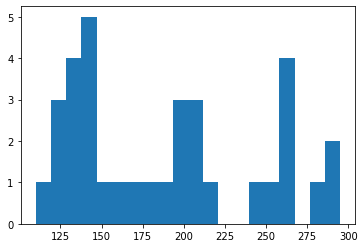

In [151]:
plt.hist(description_length, bins=20)
plt.show()

# Try and extract content

In [172]:
def get_text_from_url(url, description):
    try:
        page = requests.get(url)
        
        soup = BeautifulSoup(page.content, "html.parser")
        for script in soup(["script", "style"]):
            script.extract()

        text = soup.get_text()

        lines = (line.strip() for line in text.splitlines())

        chunks = (phrase.strip() for line in lines for phrase in line.split("  "))

        text = '\n'.join(chunk for chunk in chunks if chunk)

        clean_text = []

        for line in text.splitlines():
            if len(line) > 30:
                sentences = [description, line]
                embeddings = model.encode(sentences)
                result = 1 - spatial.distance.cosine(embeddings[0], embeddings[1])
                if result > 0.25:
                    clean_text.append(line)


        text = ". ".join(clean_text)
        return text
    
    except ContentDecodingError:
        pass

In [173]:
for result in results:
    description = result["description"]
    url = result["url"]
    print(get_text_from_url(url, description))
    print("--------------------------------------------------------------")

Woman hosting Ukrainian refugee probed by police for ‘modern slavery’ after ‘dishes row’ | The Independent Jump to contentUK EditionChange. Thank you for registeringPlease refresh the page or navigate to another page on the site to be automatically logged inPlease refresh your browser to be logged inNewsUKHome NewsWoman hosting Ukrainian refugee probed by police for ‘modern slavery’ after ‘dishes row’Police launched investigation after Homes for Ukraine arrangement broke down Emily AtkinsonSaturday 29 October 2022 21:11. Tens of thousands of Ukranians were welcomed to the UK after the war with Russia began. Please enter a valid email addressPlease enter a valid email addressSIGN UPI would like to be emailed about offers, events and updates from The Independent. Read our privacy noticeA mother-of-two was investigated for “modern slavery” after a Ukrainian refugee she was hosting in the UK complained to the police. Hannah Debenham and her husband invited the woman and her 10 year-old dau

Suella Braverman and British victims of modern slavery - Ekklesia. Suella Braverman and British victims of modern slavery. SUELLA BRAVERMAN’S UGLY BRAND OF ‘PATRIOTISM’, which seems to consist largely of being as harsh as possible towards asylum seekers, may paradoxically result in a failure to protect or support some of the most vulnerable British citizens – including children. Indeed, her approach could be a grim example of how xenophobic right-wing politics always fails the least privileged, no matter what their nationality.. In August, a joint report from the British Red Cross and the UN Refugee Agency found that people seeking asylum in the UK were placed at risk of modern slavery because there was “too much focus on immigration enforcement rather than safety and protection”.. Nevertheless, in her first incarnation as Home Secretary, Suella Braverman announced that the focus on immigration enforcement would become even more intense. In a speech to the Conservative Party Conference

2022 could be worst year for modern slavery - with 8,000 victims in first 6 months - CoventryLive. News2022 could be worst year for modern slavery - with 8,000 victims in first 6 monthsThe figures come as the British Standards Institute (BSI) launches its new world first national standard to help organisations across the UK eradicate modern slaverywalesonlineBookmarkShareCommentsNewsBySarah Lumley10:34, 25 OCT 2022BookmarkNearly 8,000 people in the UK have been victims of modern slavery in the first six months of 2022 (Image: Mathew Chattle/Future Publishing/Getty Images)Group 28Our free email updates are the best way to get headlines direct to your inboxInvalid emailSomething went wrong, please try again later.Sign UpNo thanks, closeWe use your sign-up to provide content in the ways you've consented to and improve our understanding of you. This means that we may include adverts from us and third parties based on our knowledge of you. We also may change the frequency you receive our em

Intelligence task force uncovers potential modern slavery in Hampshire, say police | The News. Five generations of a Pompey brood introduce the newest addition to his great-great-grandfather.​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​​NewsLatestTraffic and TravelCrimeWeatherPoliticsHealthDefenceBusinessEducationPeopleRead ThisPortsmouth FCUkraineSportFootballOther SportHomes & GardensWhat's OnThings To DoNightlifeArts and EntertainmentGreat South RunSubmit Your StoryRetroLifestyleStaycationFamilyCarsHomes and GardensPetsPuzzlese-PaperRecommendedEntertainmentTechnologyLifestyleHome and GardenFashion and BeautyDealsPublic NoticesFree Happy AdsCrimeIntelligence task force uncovers potential modern slavery in Hampshire, say policeMODERN 

Man rescued from modern slavery in Newport speaks about ordeal | South Wales Argus. 'I will never forget what happened to me': Modern slavery victim speaks about ordeal. Man rescued from modern slavery in Newport speaks about ordeal. Normunds Freibergs, 40, of Morley Close, Newport, who was convicted of forced or compulsory labour and human trafficking offences and his accomplices Jakobus Stankevicius, 59, and Ruta Stankeviciene, 57, both of Capel Close, Newport. Picture: PA (Image: Newsquest). A MAN who was rescued from modern slavery in Newport has said he is too scared to return to South Wales.. Latvian national Rolands Kazoks, who is now in his early 30s, said the actions of Normunds Freibergs, Jacobus Stankevicius and Ruta Stankeviciene meant he now struggled to trust people for fear of them taking advantage of him.. Freibergs and Stankevicius were both jailed last week, while Stankeviciene was handed a suspended prison sentence.. Normunds Freibergs, 40, of Morley Close, Newport, 

Charities call on Sunak to reverse attacks on victims of modern day slavery | Morning Star. Lula’s victory shows progressive politics are far superior to bland centrism in combatting the right. Charities call on Sunak to reverse attacks on victims of modern day slavery. RISHI SUNAK must reverse government attacks on victims of modern slavery and trafficking, campaigners have demanded.. As the new PM steps into office, campaigners are urging him to prioritise modern slavery victims and move away from “harmful” rhetoric.. It comes after Suella Braverman, who was re-appointed as Home Secretary on Tuesday afternoon just six days after being forced to resign over a security breach, claimed people were “gaming” the slavery initiative for immigration purposes.. Concerns over Ms Braverman’s approach intensified earlier this month after it was revealed that her office had reclassified modern slavery as an “illegal immigration issue” rather than an issue for the safeguarding minister.. Her prede

Modern slavery cases rise in Lancs as Home Office accuse victims of 'abusing system' | Lancashire Telegraph. Almost half of all modern slavery referrals in Lancashire are children. Modern slavery cases rise in Lancs as Home Office accuse victims of 'abusing system'. Modern slavery (Image: PA Archive/PA Images). The number of cases of modern slavery referred to police in Lancashire has risen over the last year, with almost half of them being children.. Latest Home Office figures show 145 potential modern slavery cases were referred to the police for investigation in the year to June – and of them, 61 were aged 17 and under.. Across the rest of the UK, modern slavery referrals for suspected victims have also risen.. There were 14,600 in the year to June, and 5,800 of them were children – up from 11,600 and 5,200 respectively the year before.. The rise in cases comes as the Home Office revealed plans to restrict such claims to stop alleged "abuse" of the system.. Former Home Secretary Sue

Knitted 'chains' in Worcestershire highlight modern slavery | Worcester News. Knitted 'chains' in Worcestershire highlight modern slavery. Worcester Diocesan Mothers’ Union has been working on a special campaign to raise awareness of modern slavery.. The group has joined 50 Mothers’ Union Groups and churches across the country to knit and crochet chains.. It comes as communities join together to raise awareness of the information from Worcester MU and the Clewer Initiative, which is partnered with the Mothers' Union.. There have also been displays and chains at Worcester Cathedral, Malvern Priory and at rural churches across the county.. Judith Grubb, Worcester Mothers’ Union diocesan president, said: “The Mothers' Union was particularly concerned about the trafficking of young girls and successfully campaigned for the 'Abolition of White Slavery Bill' in 1912, and the Mothers Union remains concerned about the trafficking of young girls as well as the lack of freedom for so many people

Modern slavery criminals in West Yorkshire rarely punished | Bradford Telegraph and Argus. The grim reality of exploitation as criminals are rarely brought to justice. Modern slavery criminals in West Yorkshire rarely punished. The grim reality of exploitation as criminals are rarely brought to justice (Image: Picture). NEARLY 800 modern slavery offences were recorded by West Yorkshire Police in a three-year period – but just three per cent of cases resulted in a charge or summons.. Modern slavery is the illegal exploitation of people for personal or commercial gain.. It covers a wide range of abuse and exploitation including sexual exploitation, domestic servitude, forced labour, criminal exploitation and even organ harvesting.. Victims are tricked or threatened into work and may feel unable to leave or report the crime – they may not even recognise they are a victim.. Earlier this year, a safe space for victims of modern slavery opened in West Yorkshire.. According to the FOI figures

Salvation Army supporting victims of modern slavery | Bridgwater Mercury. Criminal gangs tighten grip on modern slavery across South West. Salvation Army supporting victims of modern slavery. A survivor of modern day slavery. Picture: Salvation Army. MORE victims of organised criminal gangs are being referred to The Salvation Army’s modern slavery services in the South West than ever before, according to a new report.. Last year 150 people were rescued from modern slavery in the region, the majority of whom had been forced to commit crimes, work against their will, or coerced into sex work - a 4.3per cent increase on the previous year.. The Salvation Army, which provides support to help survivors recover through its network of safe houses and outreach services, is warning this is just the tip of the iceberg.. The figures are part of the church and charity’s 11th annual report on its work providing specialist support to adult victims of modern slavery in England and Wales through the Go

'I called for a Welsh Government Statement on Modern Slavery' | The Leader. 'I called for a Welsh Government Statement on Modern Slavery'. 'I called for a Welsh Government Statement on Modern Slavery'. Questioning the Minister for Climate Change, I quoted StatsWales figures showing that 7,492 new Social Homes were delivered in Wales during the first 12 years of devolved Labour Government, 11 of which coincided with a UK Labour Government - a 73.45% fall on the 28,215 new Social Homes delivered in Wales during the 12 years of UK Conservative Government up to 1997, and again noted that even the latest published figures for quarter 2 of this year show that Wales was the only nation or region of 12 in the UK to see new home completions reduce.. I asked “when will you stop telling and start asking the whole housing sector, including cross-sector housing providers, how to tackle Labour's long-standing affordable housing supply crisis in Wales, which I and the whole sector began warning Labou


--------------------------------------------------------------
University of Dundee publishes report into slavery links | University of Dundee. Press release University of Dundee publishes report into slavery links. The University of Dundee has today published a report into the institution's historical links with transatlantic slavery.. The study acknowledges that whilst the University’s founders played a leading role in widening access to education by promoting the education of students of both sexes, Mary Ann Baxter and her family’s fortune was derived indirectly from slavery.. The Founders Project Final Report, authored by Dr Cassandra Gooptar from the University of Dundee, is the culmination of three months of intensive research designed to deepen understanding of Dundee’s role in Britain’s imperial past.. The University of Dundee has its roots in the University College Dundee, which was founded in 1881 with the donation of £140,000 from Mary Ann Baxter and her cousin, John Boyd B